In [ ]:
!pip install mediapipe
"""
Use Case in our code:

To detect 468 facial landmarks
from static images in the AFLW2000 dataset.
These landmarks represent precise 3D
positions (x, y, z) on the human face.

- It's lightweight and fast, suitable for real-time and offline applications.
- Eliminates the need to train a separate landmark detection model.

- Extract 2D (x, y) coordinates of facial landmarks.
- Normalize and center these coordinates to create feature vectors.
- Use these features as input to traditional machine learning models
  (SVM, Random Forest, KNN, etc.) to predict head pose angles
  (yaw, pitch, roll).
"""

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 649.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 10.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.7 which is incompati

"\nUse Case in our code:\n\nTo detect 468 facial landmarks\nfrom static images in the AFLW2000 dataset.\nThese landmarks represent precise 3D\npositions (x, y, z) on the human face.\n\n- It's lightweight and fast, suitable for real-time and offline applications.\n- Eliminates the need to train a separate landmark detection model.\n\n- Extract 2D (x, y) coordinates of facial landmarks.\n- Normalize and center these coordinates to create feature vectors.\n- Use these features as input to traditional machine learning models\n  (SVM, Random Forest, KNN, etc.) to predict head pose angles\n  (yaw, pitch, roll).\n"

In [ ]:
!pip install --force-reinstall --no-cache-dir pandas scipy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 299.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 141.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 296.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 294.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 295.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 331.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 395.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 410.2 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2025.2
    Uninstalling tzdata-2025.2:
      Successfully

In [ ]:
import os,cv2,math,time,glob
import numpy as np
import PIL
import io
import random as rd
import pandas as pd
import html
import scipy.io as sio
import matplotlib.pyplot as plt
import PIL.Image
import argparse
import imutils
import dlib
import joblib
import mediapipe
from google.colab.output import eval_js
from base64 import b64decode, b64encode

from sklearn import metrics
from skimage.io import imread, imsave
from google.colab import drive
from tensorflow.keras.preprocessing import image_dataset_from_directory
from skimage.io import imread, imsave
from IPython.display import Image, display, Javascript
from google.colab.patches import cv2_imshow
from imutils import face_utils

from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

DATASET_PATH = '/content/drive/MyDrive/MV/AFLW2000'
VIDEO_PATH = '/content/drive/MyDrive/MV/VIDEO'
MODELS_PATH = '/content/drive/MyDrive/MV/MODELS'
os.makedirs(MODELS_PATH, exist_ok=True)

Mounted at /content/drive


In [ ]:
# #small test for the keys error to print el available keys goa el .mat file

# import scipy.io as sio


# mat_test = sio.loadmat(DATASET_PATH + '/' + file_names[0] + '.mat')
# print(mat_test.keys())


El block dah bey3mel el aaty:

Bey-load 2000 sora men AFLW2000 dataset.

Bey-estakhdem MediaPipe FaceMesh 3ashan yegib 468 landmark points (x, y) lel wish fe kol sora.

Bey-load el labels el sa7 (pitch, yaw, roll) men el .mat files el met3la2a bel sowar.

W y7ot el data kolaha fe arrays 3ashan nesta3melha ba3deen fel training bel ML models


In [ ]:
from pathlib import Path

# X_points, Y_points, labels and detected files which are the images thar MediaPipe was able to detect the face
x_points= []
y_points = []
labels = []
detected_files = []

# extracting the file names (2000 name)

file_names = sorted([Path(f).stem for f in glob.glob(DATASET_PATH + '/*.mat')])
#By-loop 3ala el directory, we y-geeb asami el files ely fihom el labels.
#Bey-sheel .mat we ykhally el base name 3ashan ne-estakhdemo ma3 .jpg sora.



# detecting faces and extracting the points
faceModule = mediapipe.solutions.face_mesh
# looping over the file names to load the images and their corresponding mat file
for filename in file_names:
  with faceModule.FaceMesh(static_image_mode=True) as faces:   #static_image_mode=True: 3ashan ne2ool le MediaPipe en el sor static mesh video.


    # loading the image
    image = cv2.imread(DATASET_PATH + '/' + filename + '.jpg')

    # processing the image to detect the face and then generating the land marks (468 for each x,y,z).

    results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  #MediaPipe bey7tag RGB
    if results.multi_face_landmarks != None: #cleaning of bad data
          # appending the file names where have been detected.
          detected_files.append(filename)
          # detecting the face
          face = results.multi_face_landmarks[0]
          # initializing two lists to store the points for the image.
          X = []
          Y = []
          # looping over the 468 points of x and y
          for landmark in face.landmark:
              x = landmark.x
              y = landmark.y
              # note: the x and y values are scaled to the their width and height so we will get back their actual value in the image.
              shape = image.shape
              relative_x = int(x * shape[1])
              relative_y = int(y * shape[0])
              # X_features
              X.append(relative_x)
              # Y_features
              Y.append(relative_y)

          # converting the lists to numpy arrays
          X = np.array(X)
          Y = np.array(Y)
          # appending the points of the images in the list of all image points
          x_points.append(X)
          y_points.append(Y)

          # loading the mat file to extract the labels (pitch,yaw,roll)
          mat_file = sio.loadmat(DATASET_PATH + '/' + filename + '.mat')

          # extracting the labels 3 angels
          pose_param = mat_file["Pose_Para"][0][:3]
          # appending the 3 angels to labels list
          labels.append(pose_param)

# converting features and labels to 2D array
x_points = np.array(x_points)
y_points = np.array(y_points)
labels = np.array(labels)

if labels.size > 0:  # Check if labels is not empty
    # pitch
    pitch_label = labels[:,0]
    # yaw
    yaw_label = labels[:,1]
    # roll
    roll_label = labels[:,2]
else:
    print("No faces detected in the dataset. 'labels' array is empty.")

#labels[:, 0] yakhod column el awel (0) yeb2a pitch_label
#labels[:, 1]   yakhod column el tany (1) yeb2a yaw_label
#labels[:, 2]   yakhod column el talet (2) yeb2a roll_label


print(x_points.shape)
print(y_points.shape)
print(labels.shape)

(1853, 468)
(1853, 468)
(1853, 3)


#bagarab a2ra el labels ashof el angles shabah el output wala la

In [ ]:
# Show what’s inside the very first .mat file (variable names, shapes, types)
import os
import scipy.io as sio

# Path to the first .mat file
first_mat = os.path.join(DATASET_PATH, file_names[2] + '.mat')

# Load the contents
mat = sio.loadmat(first_mat)

# Inspect the Pose_Para variable
# It should be an array of shape (1, n) where the first three entries are [pitch, yaw, roll]
pose = mat['Pose_Para'][0]
pitch, yaw, roll = pose[:3]

print(f"File: {file_names[2]}.mat")
print(f"  Pitch: {pitch:.4f}°")
print(f"   Yaw: {yaw:.4f}°")
print(f"  Roll: {roll:.4f}°")


Kol image feeha 468 landmark points.

El landmark rakam 99 bykoun roughly fe no2tat el middle of the face (like the nose bridge).

Fa 3ayzeen ne5ali el origin (0,0) howa el point dah  so beneshil kol el landmarks relative to it.


In [ ]:
x_center = x_points - x_points[:,99].reshape(-1,1)
y_center = y_points - y_points[:,99].reshape(-1,1)

# normalizing the data
#Points 10 & 171 homa landmarks fe ganbeen el face (left and right).
#E7na benesta3mlhom 3ashan n7seb el distance between two cheeks el width of the face.
X_171 = x_points[:,171]
X_10 = x_points[:,10]
Y_171 = y_points[:,171]
Y_10 = y_points[:,10]

# computing the distance
#Dah el Euclidean distance between the two cheek points, 3ashan n3ml normalization lel size el wesh.
distance = np.linalg.norm(np.array((X_10,Y_10)) - np.array((X_171,Y_171)),axis = 0).reshape(-1,1)
Norm_x = x_center / distance
Norm_y = y_center / distance
final_x = Norm_x
final_y = Norm_y
features = np.hstack([final_x,final_y])

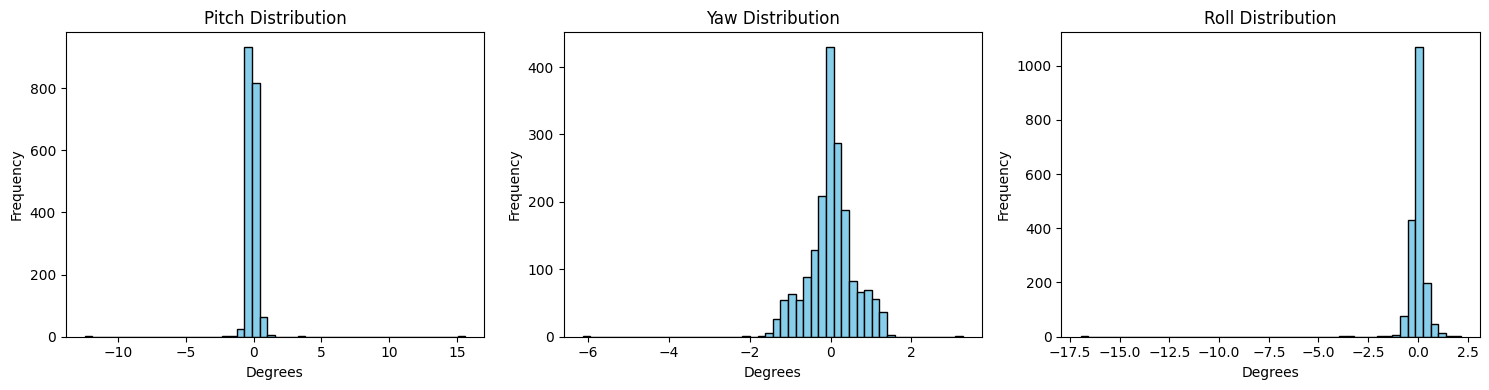

In [ ]:
import matplotlib.pyplot as plt

angles = ['Pitch', 'Yaw', 'Roll']
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

for i in range(3):
    axs[i].hist(labels[:, i], bins=50, color='skyblue', edgecolor='black')
    axs[i].set_title(f'{angles[i]} Distribution')
    axs[i].set_xlabel('Degrees')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


1. Pitch:
El distribution daye2 awi hawl el zero .

Fee kam value extreme, khosoosan elly > 10°, we dah ghareeb shwaya 3ala el pitch.

El soora betewareena en fe3lan fee outliers.

2. Yaw:
El curve shaklo normal, symmetric we centered 3ala el 0.

El values btenzel gradually 3ala el gambeen.

Fee kam outlier baseeta (zay < -6° aw > 2°), bas el overall clean.

3. Roll:
El distribution left-skewed.

Most el data mowgoda 3and el zero, bas fe tail taweel beyro7 le -17°.

Dah beyshawar en fee outliers kebeer aw momken labels ghalat.

//////////////////////////////////////////////////////////////////////////////


El function di betakhod el data (zay pitch aw yaw aw roll values) we:

Bet7seb el quartiles (Q1 = 25%, Q3 = 75%)

Bet7seb el IQR = Q3 - Q1 → dah el range elly feeh akthar el data

Bet7ded bounds:

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR
Ay value barra el range da betet3abar enha outlier

Bet3mel mask (boolean array) 3ashan to2ol el anhy values outliers

Betraga3 el mask (mesh el data itself)

In [ ]:

def detect_outliers_iqr(data, label_name):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_mask = (data < lower_bound) | (data > upper_bound)
    count = np.sum(outlier_mask)
    print(f"{label_name}: {count} outliers detected")
    return outlier_mask

# Detect outliers individually
pitch_outliers = detect_outliers_iqr(labels[:, 0], "Pitch")
yaw_outliers   = detect_outliers_iqr(labels[:, 1], "Yaw")
roll_outliers  = detect_outliers_iqr(labels[:, 2], "Roll")

# Combine all detected outliers
combined_outliers = pitch_outliers | yaw_outliers | roll_outliers
print(f"\nTotal outlier samples to remove: {np.sum(combined_outliers)}")

# Filter the data
features_cleaned = features[~combined_outliers]
labels_cleaned = labels[~combined_outliers]

print(f"Original dataset size: {len(labels)}")
print(f"Cleaned dataset size: {len(labels_cleaned)}")


Pitch: 109 outliers detected
Yaw: 134 outliers detected
Roll: 141 outliers detected

Total outlier samples to remove: 273
Original dataset size: 1853
Cleaned dataset size: 1580


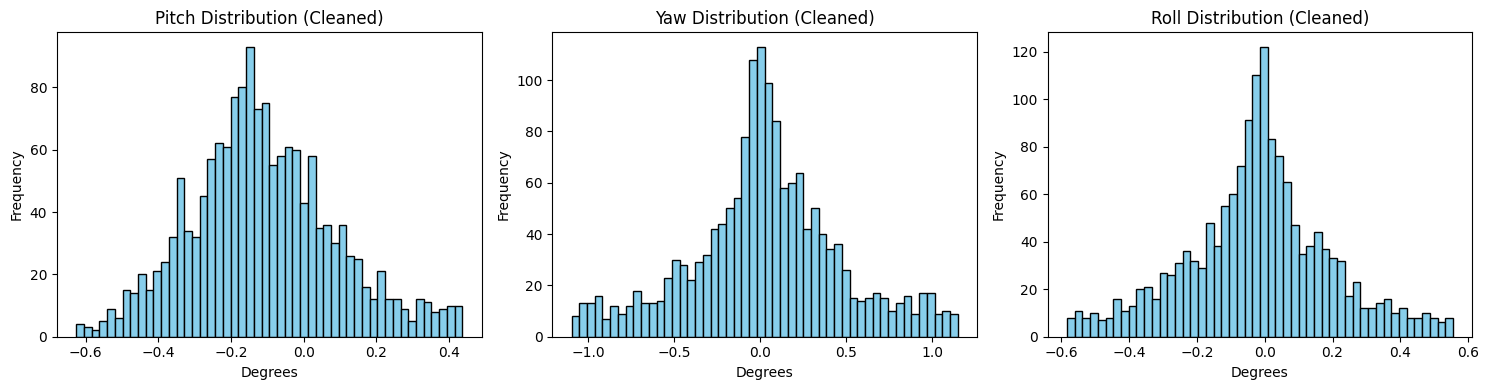

In [ ]:
angles = ['Pitch', 'Yaw', 'Roll']
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

for i in range(3):
    axs[i].hist(labels_cleaned[:, i], bins=50, color='skyblue', edgecolor='black')
    axs[i].set_title(f'{angles[i]} Distribution (Cleaned)')
    axs[i].set_xlabel('Degrees')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

3ashan lama t3amly training 3ala train/test split wa7ed, momken el model ykoon biased. Cross-validation by5ally el evaluation more reliable we more general.

3amalt function esmaha train_with_cross_validation() we deh:

Bet5od model (ex. SVM, RandomForest, etc.)

Bettrain el model 3ala 5 folds (by default)

Bet7seb:

MAE (mean absolute error)

RMSE (root mean squared error)

W bterg3 el performance btaraf kol fold

W bta3mel plot lel MAE & RMSE over the folds

train_with_cross_validation(
    ModelClass = el model zay SVR,
    model_args = el parameters bta3to (e.g. kernel='rbf')
    features = el features elly gebnha men MediaPipe
    labels = el yaw/pitch/roll labels
    label_index = 0 law pitch, 1 law yaw, 2 law roll,
    n_splits = kam fold (default 5),
    model_name = esm ele 3ayza yzhar fe el print/plot
)
Ezzay el code byshteghal?
Byloop 3ala el dataset using KFold

Fe kol fold:

By2sem el data le training/test

Bytrain el model 3ala el training set

Bykayem el performance 3ala el test set

By7seb el MAE & RMSE w ye7otohom fe list

Ba3d el loop:

Byplot el errors

By2ollik el average MAE & RMSE (useful le comparison)



In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import time

def train_with_cross_validation(ModelClass, model_args, features, labels, label_index, n_splits=5, model_name=""):
    mae_list = []
    rmse_list = []
    r2_list = []

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    fold = 1

    print(f"\n Training {model_name} on {['Pitch', 'Yaw', 'Roll'][label_index]}")

    start_time = time.time()

    for train_index, test_index in kf.split(features):
        X_train, X_test = features[train_index], features[test_index]
        y_train, y_test = labels[train_index, label_index], labels[test_index, label_index]

        model = ModelClass(**model_args)
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        mae = mean_absolute_error(y_test, preds)
        rmse = np.sqrt(mean_squared_error(y_test, preds))
        r2 = r2_score(y_test, preds)

        mae_list.append(mae)
        rmse_list.append(rmse)
        r2_list.append(r2)

        print(f"Fold {fold}: MAE = {mae:.3f}, RMSE = {rmse:.3f}, R² = {r2:.3f}")
        fold += 1

    end_time = time.time()
    training_time = end_time - start_time

    print(f"\nTotal training time: {training_time:.2f} seconds")
    print(f"Avg MAE = {np.mean(mae_list):.3f}, Avg RMSE = {np.mean(rmse_list):.3f}, Avg R² = {np.mean(r2_list):.3f}")

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(mae_list, label="MAE", marker='o')
    plt.plot(rmse_list, label="RMSE", marker='s')
    plt.plot(r2_list, label="R² Score", marker='^')
    plt.xlabel("Fold")
    plt.ylabel("Error/Score")
    plt.title(f"{model_name} - {['Pitch', 'Yaw', 'Roll'][label_index]}")
    plt.legend()
    plt.grid(True)
    plt.show()

    return {
        "model": model,
        "training_time": training_time,
        "avg_mae": np.mean(mae_list),
        "avg_rmse": np.mean(rmse_list),
        "avg_r2": np.mean(r2_list)
    }




 Training SVM on Pitch
Fold 1: MAE = 0.062, RMSE = 0.086, R² = 0.817
Fold 2: MAE = 0.063, RMSE = 0.090, R² = 0.786
Fold 3: MAE = 0.070, RMSE = 0.096, R² = 0.773
Fold 4: MAE = 0.068, RMSE = 0.095, R² = 0.784
Fold 5: MAE = 0.067, RMSE = 0.086, R² = 0.809

Total training time: 0.97 seconds
Avg MAE = 0.066, Avg RMSE = 0.091, Avg R² = 0.794


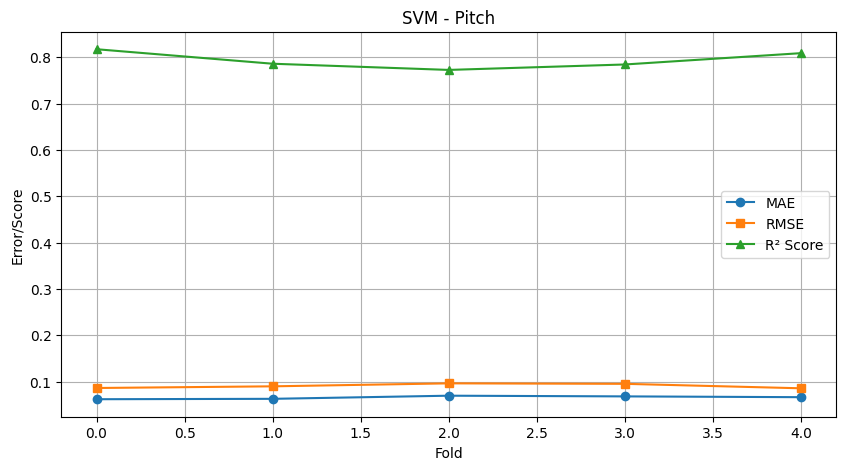


 Training SVM on Yaw
Fold 1: MAE = 0.053, RMSE = 0.089, R² = 0.952
Fold 2: MAE = 0.058, RMSE = 0.085, R² = 0.966
Fold 3: MAE = 0.055, RMSE = 0.081, R² = 0.970
Fold 4: MAE = 0.060, RMSE = 0.119, R² = 0.934
Fold 5: MAE = 0.051, RMSE = 0.077, R² = 0.964

Total training time: 0.72 seconds
Avg MAE = 0.055, Avg RMSE = 0.090, Avg R² = 0.957


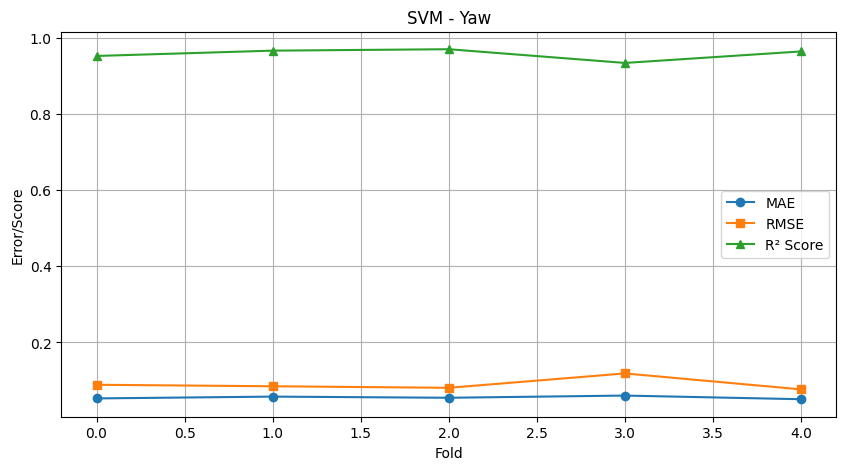


 Training SVM on Roll
Fold 1: MAE = 0.034, RMSE = 0.058, R² = 0.927
Fold 2: MAE = 0.037, RMSE = 0.062, R² = 0.911
Fold 3: MAE = 0.039, RMSE = 0.059, R² = 0.924
Fold 4: MAE = 0.037, RMSE = 0.059, R² = 0.932
Fold 5: MAE = 0.034, RMSE = 0.048, R² = 0.945

Total training time: 0.41 seconds
Avg MAE = 0.036, Avg RMSE = 0.057, Avg R² = 0.928


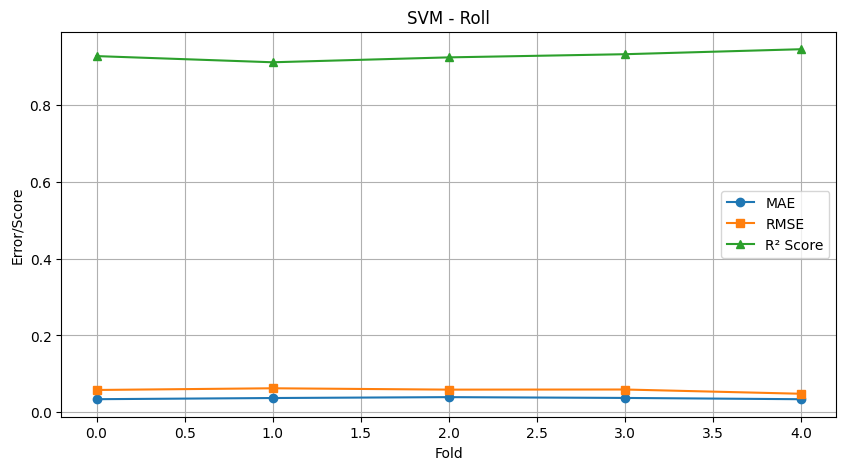

In [ ]:

svm_model_pitch = train_with_cross_validation(
    ModelClass=SVR,
    model_args={"kernel": "poly", "degree": 2},
    features=features_cleaned,
    labels=labels_cleaned,
    label_index=0,
    n_splits=5,
    model_name="SVM"
)



svm_model_yaw = train_with_cross_validation(
    ModelClass=SVR,
    model_args={"kernel": "rbf"},
    features=features_cleaned,
    labels=labels_cleaned,
    label_index=1,
    model_name="SVM"
)
svm_model_roll = train_with_cross_validation(
    ModelClass=SVR,
    model_args={"kernel": "rbf"},
    features=features_cleaned,
    labels=labels_cleaned,
    label_index=2,
    model_name="SVM"
)


In [ ]:
# rf_model = train_with_cross_validation(
#     ModelClass=RandomForestRegressor,
#     model_args={"n_estimators": 100 ,"n_jobs": -1},
#     features=features,
#     labels=labels,
#     label_index=0,
#     model_name="Random Forest"
# )
# rf_model = train_with_cross_validation(
#     ModelClass=RandomForestRegressor,
#     model_args={"n_estimators": 100,"n_jobs": -1},
#     features=features,
#     labels=labels,
#     label_index=1,
#     model_name="Random Forest"
# )
# rf_model = train_with_cross_validation(
#     ModelClass=RandomForestRegressor,
#     model_args={"n_estimators": 100,"n_jobs": -1},
#     features=features,
#     labels=labels,
#     label_index=2,
#     model_name="Random Forest"
# )



 Training KNN on Pitch
Fold 1: MAE = 0.076, RMSE = 0.102, R² = 0.744
Fold 2: MAE = 0.076, RMSE = 0.104, R² = 0.714
Fold 3: MAE = 0.080, RMSE = 0.111, R² = 0.701
Fold 4: MAE = 0.081, RMSE = 0.105, R² = 0.737
Fold 5: MAE = 0.076, RMSE = 0.099, R² = 0.746

Total training time: 0.75 seconds
Avg MAE = 0.078, Avg RMSE = 0.104, Avg R² = 0.728


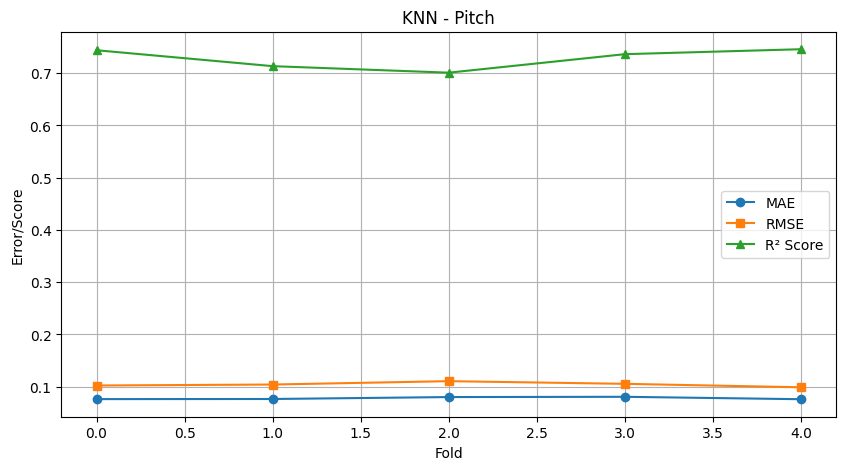


 Training KNN on Yaw
Fold 1: MAE = 0.066, RMSE = 0.095, R² = 0.954
Fold 2: MAE = 0.066, RMSE = 0.107, R² = 0.942

Total training time: 0.16 seconds
Avg MAE = 0.066, Avg RMSE = 0.101, Avg R² = 0.948


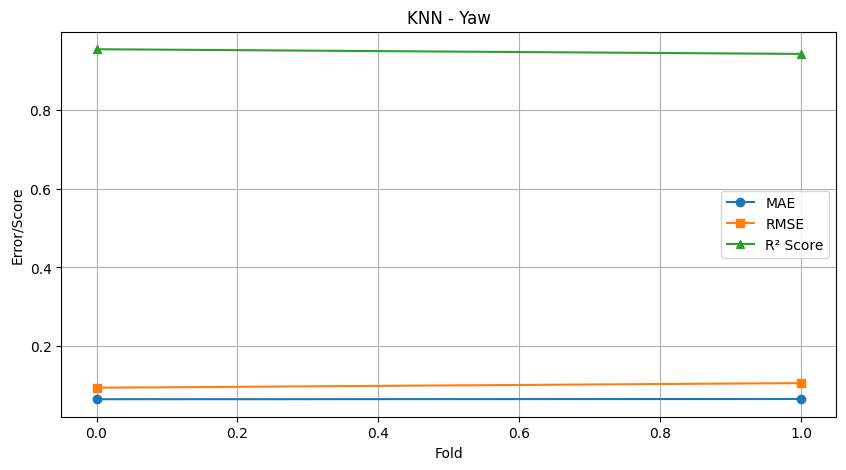


 Training KNN on Roll
Fold 1: MAE = 0.037, RMSE = 0.060, R² = 0.923
Fold 2: MAE = 0.042, RMSE = 0.067, R² = 0.898
Fold 3: MAE = 0.042, RMSE = 0.063, R² = 0.911
Fold 4: MAE = 0.042, RMSE = 0.065, R² = 0.918
Fold 5: MAE = 0.037, RMSE = 0.055, R² = 0.929

Total training time: 0.35 seconds
Avg MAE = 0.040, Avg RMSE = 0.062, Avg R² = 0.916


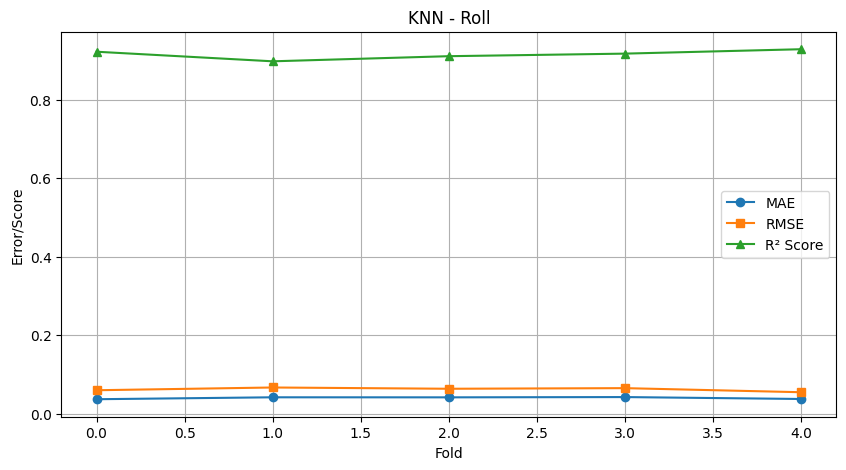

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_model_pitch = train_with_cross_validation(
    ModelClass=KNeighborsRegressor,
    model_args={"n_neighbors": 7},
    features=features_cleaned,
    labels=labels_cleaned,
    label_index=0,
    model_name="KNN"
)
knn_model_yaw = train_with_cross_validation( #7elwa
    ModelClass=KNeighborsRegressor,
    model_args={"n_neighbors": 4},
    features=features_cleaned,
    labels=labels_cleaned,
    label_index=1,
    n_splits= 2,
    model_name="KNN"
)
knn_model_roll = train_with_cross_validation( #nela
    ModelClass=KNeighborsRegressor,
    model_args={"n_neighbors": 5},
    features=features_cleaned,
    labels=labels_cleaned,
    label_index=2,
    model_name="KNN"
)




 Training SGD Regressor on Pitch
Fold 1: MAE = 0.066, RMSE = 0.093, R² = 0.788
Fold 2: MAE = 0.072, RMSE = 0.099, R² = 0.743
Fold 3: MAE = 0.079, RMSE = 0.110, R² = 0.705
Fold 4: MAE = 0.077, RMSE = 0.107, R² = 0.729
Fold 5: MAE = 0.070, RMSE = 0.093, R² = 0.775

Total training time: 0.30 seconds
Avg MAE = 0.073, Avg RMSE = 0.100, Avg R² = 0.748


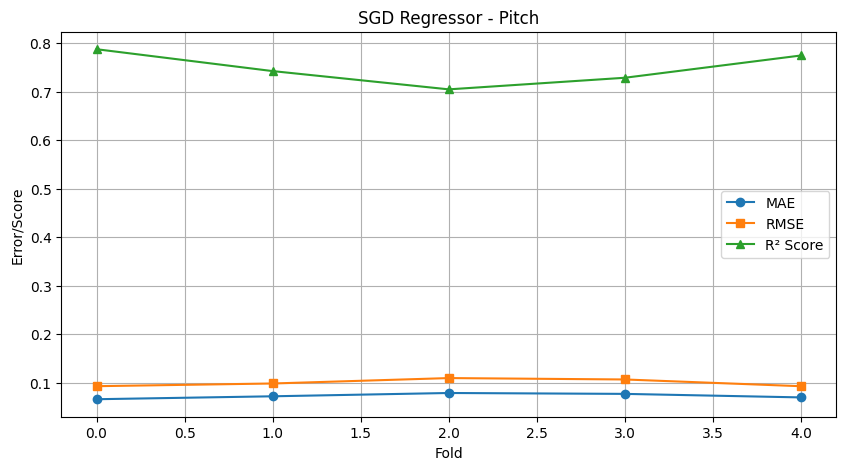


 Training SGD Regressor on Yaw
Fold 1: MAE = 0.062, RMSE = 0.097, R² = 0.943
Fold 2: MAE = 0.069, RMSE = 0.102, R² = 0.951
Fold 3: MAE = 0.060, RMSE = 0.086, R² = 0.966
Fold 4: MAE = 0.070, RMSE = 0.128, R² = 0.923
Fold 5: MAE = 0.063, RMSE = 0.089, R² = 0.951

Total training time: 0.37 seconds
Avg MAE = 0.065, Avg RMSE = 0.100, Avg R² = 0.947


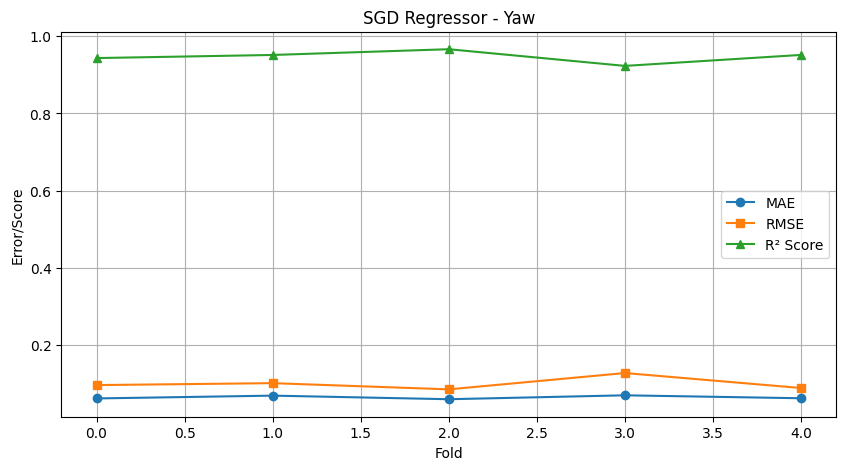


 Training SGD Regressor on Roll
Fold 1: MAE = 0.038, RMSE = 0.066, R² = 0.905
Fold 2: MAE = 0.036, RMSE = 0.066, R² = 0.901
Fold 3: MAE = 0.040, RMSE = 0.064, R² = 0.908
Fold 4: MAE = 0.042, RMSE = 0.069, R² = 0.907
Fold 5: MAE = 0.040, RMSE = 0.059, R² = 0.918

Total training time: 0.21 seconds
Avg MAE = 0.039, Avg RMSE = 0.065, Avg R² = 0.908


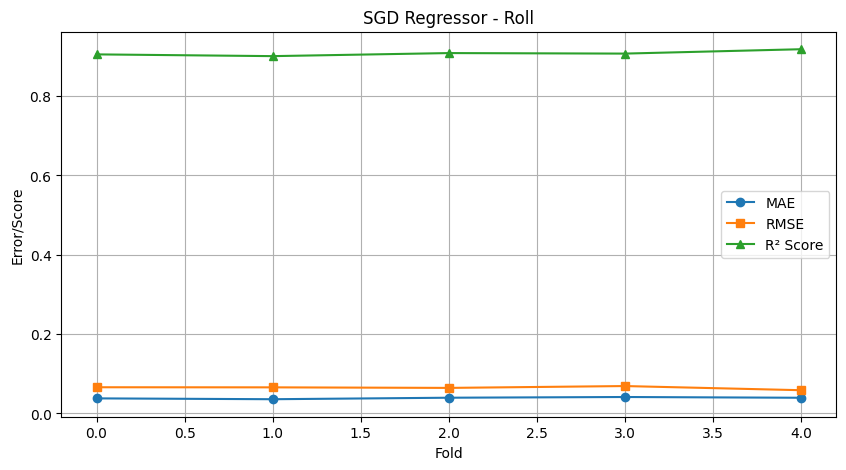

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_model_pitch = train_with_cross_validation(
    ModelClass=SGDRegressor,
    model_args={"max_iter": 1000, "tol": 1e-3},
    features=features_cleaned,
    labels=labels_cleaned,
    label_index=0,
    model_name="SGD Regressor"
)

sgd_model_yaw = train_with_cross_validation(
    ModelClass=SGDRegressor,
    model_args={"max_iter": 1000, "tol": 1e-3},
    features=features_cleaned,
    labels=labels_cleaned,
    label_index=1,
    model_name="SGD Regressor"
)

sgd_model_roll = train_with_cross_validation(
    ModelClass=SGDRegressor,
    model_args={"max_iter": 1000, "tol": 1e-3},
    features=features_cleaned,
    labels=labels_cleaned,
    label_index=2,
    model_name="SGD Regressor"
)



 Training SVM (Raw) on Yaw
Fold 1: MAE = 0.103, RMSE = 0.385, R² = 0.655
Fold 2: MAE = 0.089, RMSE = 0.255, R² = 0.816
Fold 3: MAE = 0.075, RMSE = 0.149, R² = 0.929
Fold 4: MAE = 0.065, RMSE = 0.095, R² = 0.970
Fold 5: MAE = 0.069, RMSE = 0.117, R² = 0.951

Total training time: 1.38 seconds
Avg MAE = 0.080, Avg RMSE = 0.200, Avg R² = 0.864


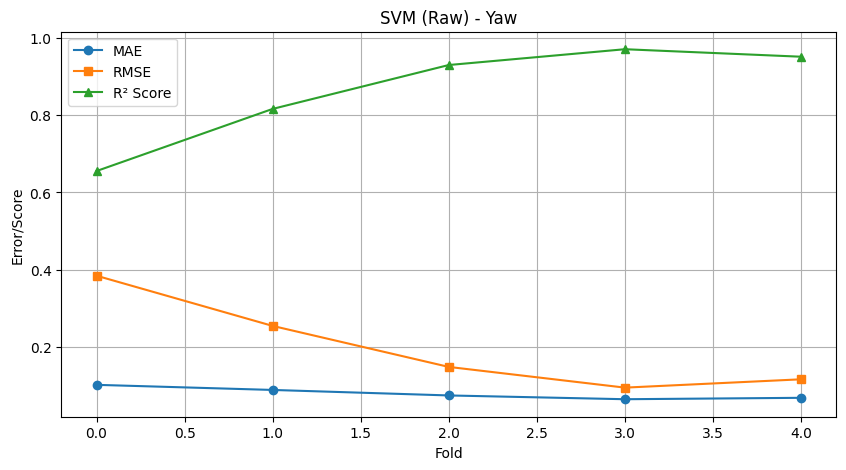


 Training SVM (Cleaned) on Yaw
Fold 1: MAE = 0.055, RMSE = 0.091, R² = 0.950
Fold 2: MAE = 0.063, RMSE = 0.093, R² = 0.959
Fold 3: MAE = 0.059, RMSE = 0.088, R² = 0.964
Fold 4: MAE = 0.063, RMSE = 0.121, R² = 0.931
Fold 5: MAE = 0.055, RMSE = 0.081, R² = 0.959

Total training time: 0.82 seconds
Avg MAE = 0.059, Avg RMSE = 0.095, Avg R² = 0.953


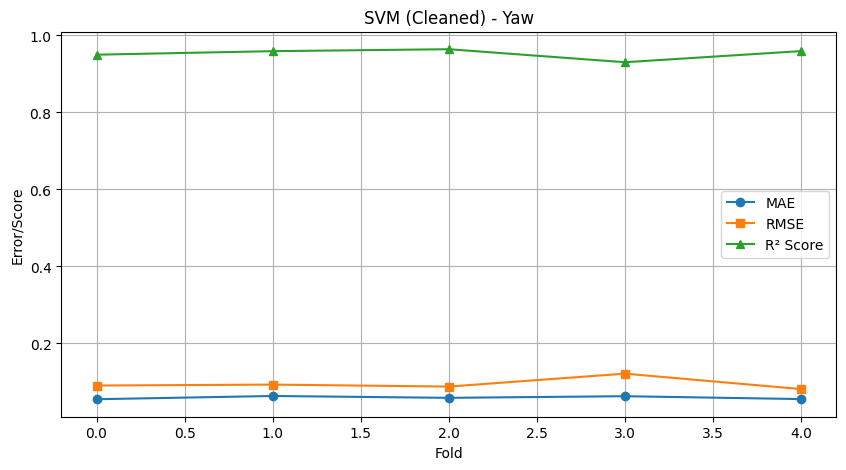


--- SVM Pitch Comparison ---
Raw     - MAE: 0.080, RMSE: 0.200, R²: 0.864
Cleaned - MAE: 0.059, RMSE: 0.095, R²: 0.953


In [ ]:
# --- Before Cleaning ---
svm_yaw_raw = train_with_cross_validation(
    ModelClass=SVR,
    model_args={"kernel": "poly", "degree": 2},
    features=features,
    labels=labels,
    label_index=1,
    model_name="SVM (Raw)"
)

# --- After Cleaning ---
svm_yaw_clean = train_with_cross_validation(
    ModelClass=SVR,
    model_args={"kernel": "poly", "degree": 2},
    features=features_cleaned,
    labels=labels_cleaned,
    label_index=1,
    model_name="SVM (Cleaned)"
)

# Compare Results
print("\n--- SVM Pitch Comparison ---")
print(f"Raw     - MAE: {svm_yaw_raw['avg_mae']:.3f}, RMSE: {svm_yaw_raw['avg_rmse']:.3f}, R²: {svm_yaw_raw['avg_r2']:.3f}")
print(f"Cleaned - MAE: {svm_yaw_clean['avg_mae']:.3f}, RMSE: {svm_yaw_clean['avg_rmse']:.3f}, R²: {svm_yaw_clean['avg_r2']:.3f}")


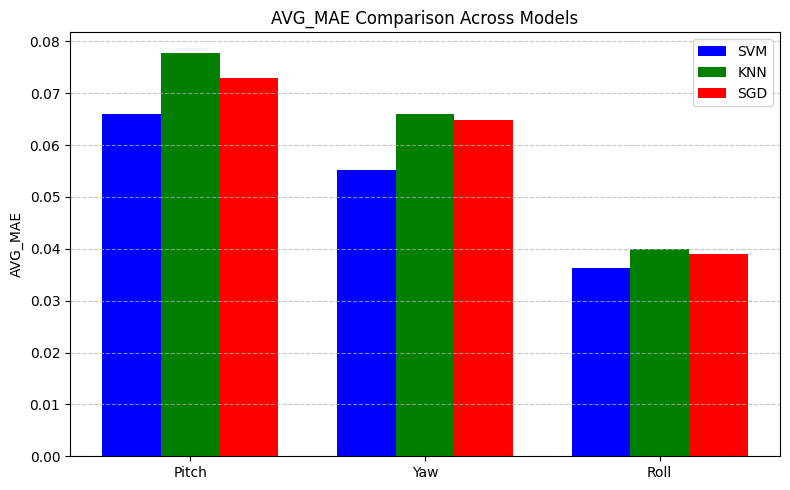

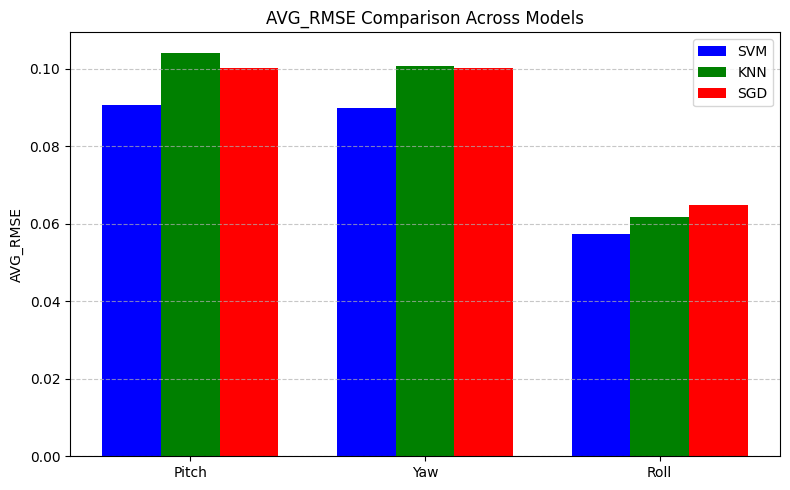

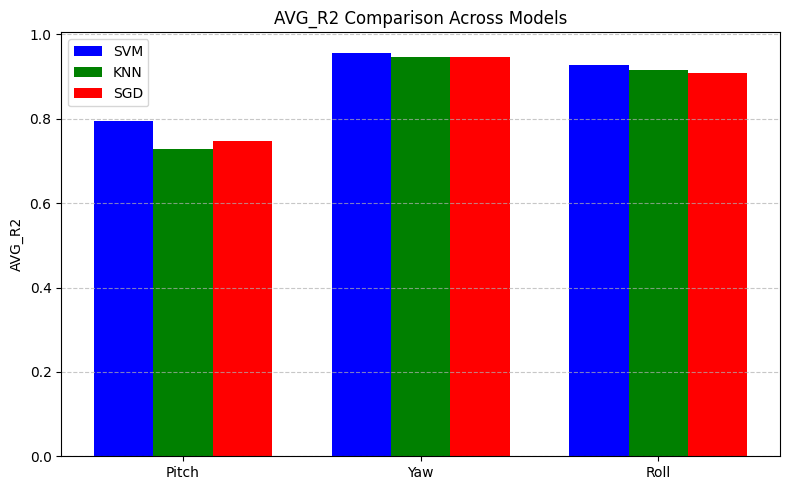

In [ ]:
#  dictionary of trained models
models = {
    "SVM": [svm_model_pitch, svm_model_yaw, svm_model_roll],
    "KNN": [knn_model_pitch, knn_model_yaw, knn_model_roll],
    "SGD": [sgd_model_pitch, sgd_model_yaw, sgd_model_roll]
}

metrics = ['avg_mae', 'avg_rmse', 'avg_r2']
angles = ['Pitch', 'Yaw', 'Roll']
model_names = list(models.keys())
colors = ['blue', 'green', 'red']

x = np.arange(len(angles))  # Pitch, Yaw, Roll
width = 0.25

for metric in metrics:
    plt.figure(figsize=(8, 5))
    for i, model_name in enumerate(model_names):
        values = [models[model_name][j][metric] for j in range(3)]
        plt.bar(x + i * width, values, width, label=model_name, color=colors[i])

    plt.xticks(x + width, angles)
    plt.ylabel(metric.upper())
    plt.title(f'{metric.upper()} Comparison Across Models')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


hna ana badownload el best model 3shan asta3mlo 3ala vs code

In [ ]:
import joblib

joblib.dump(svm_model_yaw, "svm_yaw_model.pkl")
joblib.dump(svm_model_pitch, "svm_pitch_model.pkl")
joblib.dump(svm_model_roll, "svm_roll_model.pkl")


['svm_roll_model.pkl']

In [ ]:
from google.colab import files
files.download("svm_yaw_model.pkl")
files.download("svm_pitch_model.pkl")
files.download("svm_roll_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>